Avaliação de escoliose utilizando um baropodometro e aprendizado de máquina - IA1s2024

Éric Fadul Cunha Yoshida - RA 148143

Luiz Eduardo Casella - RA 156702


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Carregando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
from sklearn import svm

Mounted at /content/drive


# Estudo sobre os dados

Nessa célula, buscamos plotar alguns gráficos a partir dos dados fornecidos pelo dataset para que possamos extrair algumas informações do comportamento do nosso banco de dados e entender as informações nele pertencentes.

In [ ]:
#Manipulando os dados

# Carregar os dados da planilha com cabeçalhos
file_path = '/content/drive/MyDrive/tab_features_LIM.xlsx'
#file_path = r'C:\Users\Cabas\Desktop\trabalho_ia\tab_features_LIM.xlsx'
df = pd.read_excel(file_path, header=0)
df = df.drop(axis='columns', labels=['Name', 'L_Handed', 'Male'])
df = df.rename(columns={'Female': 'Sex', 'R_Handed':'Handness'})
verdade = df.iloc[:, -1]
df = df.iloc[:, 1:5]


df = pd.concat([df, verdade], axis=1)
df.iloc[:, -1] = df.iloc[:, -1].apply(lambda y: 0 if y < 10 else 1)

print(df)

     Age  Mass  Height  Sex  Scolio
0     59  67.0    1.60    1       1
1     59  67.0    1.60    1       1
2     59  67.0    1.60    1       1
3     11  45.0    1.55    1       1
4     17  49.9    1.57    1       1
..   ...   ...     ...  ...     ...
144   14  80.7    1.62    1       0
145   13  66.7    1.57    0       0
146   12  51.0    1.65    1       0
147   72  38.0    1.50    1       1
148   50  71.0    1.60    1       1

[149 rows x 5 columns]


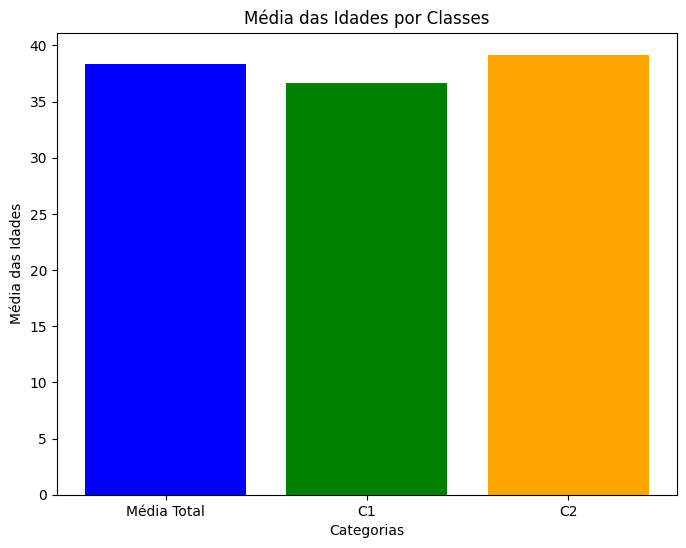

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha seu DataFrame chamado df

# Média das idades totais
media_idades_total = df['Age'].mean()

# Média das idades das pessoas com verdade 0
media_c1 = df[df['Scolio'] == 0]['Age'].mean()

# Média das idades das pessoas com verdade 1
media_c2 = df[df['Scolio'] == 1]['Age'].mean()

# Dados para o gráfico
labels = ['Média Total', 'C1', 'C2']
medias = [media_idades_total, media_c1, media_c2]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Categorias')
plt.ylabel('Média das Idades')
plt.title('Média das Idades por Classes')
plt.show()


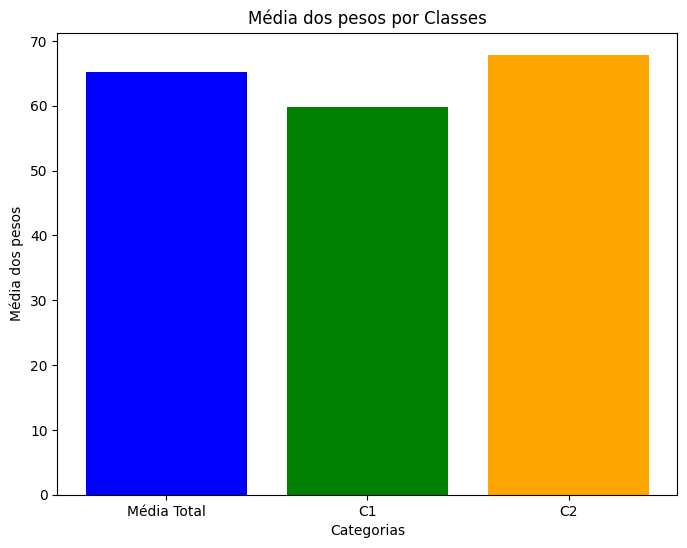

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha seu DataFrame chamado df

# Média dos pesos totais
media_pesos_total = df['Mass'].mean()

# Média dos pesos das pessoas com verdade 0
media_c1 = df[df['Scolio'] == 0]['Mass'].mean()

# Média dos pesos das pessoas com verdade 1
media_c2 = df[df['Scolio'] == 1]['Mass'].mean()

# Dados para o gráfico
labels = ['Média Total', 'C1', 'C2']
medias = [media_pesos_total, media_c1, media_c2]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Categorias')
plt.ylabel('Média dos pesos')
plt.title('Média dos pesos por Classes')
plt.show()


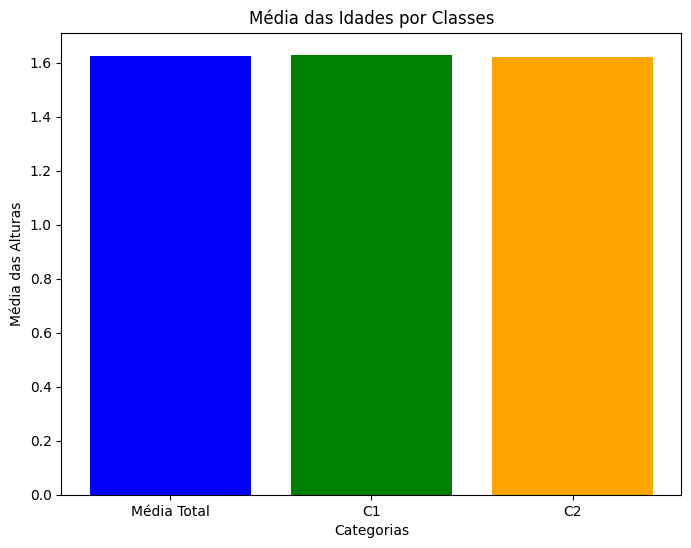

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha seu DataFrame chamado df

# Média das Alturas totais
media_idades_total = df['Height'].mean()

# Média das Alturas das pessoas com verdade 0
media_c1 = df[df['Scolio'] == 0]['Height'].mean()

# Média das Alturas das pessoas com verdade 1
media_c2 = df[df['Scolio'] == 1]['Height'].mean()

# Dados para o gráfico
labels = ['Média Total', 'C1', 'C2']
medias = [media_idades_total, media_c1, media_c2]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Categorias')
plt.ylabel('Média das Alturas')
plt.title('Média das Idades por Classes')
plt.show()


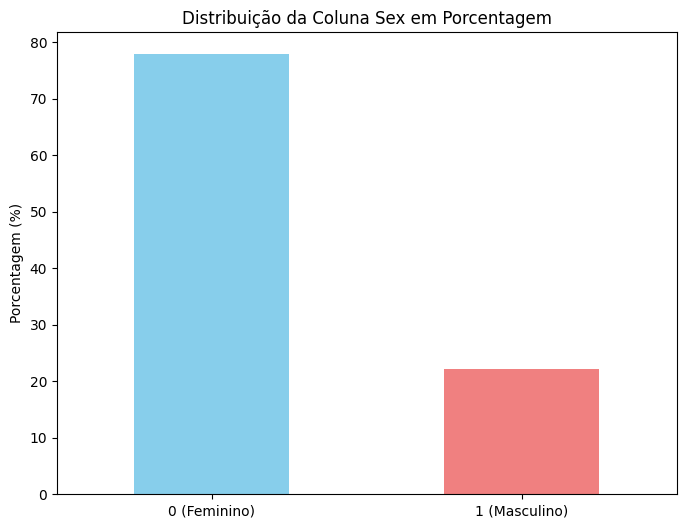

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha seu DataFrame chamado df

# Calculando a distribuição de Sex em porcentagem
distribuicao_sex = df['Sex'].value_counts(normalize=True) * 100

# Mapear os valores binários para rótulos
distribuicao_sex.index = ['0 (Feminino)', '1 (Masculino)']  # Ajuste conforme necessário

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
distribuicao_sex.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição da Coluna Sex em Porcentagem')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

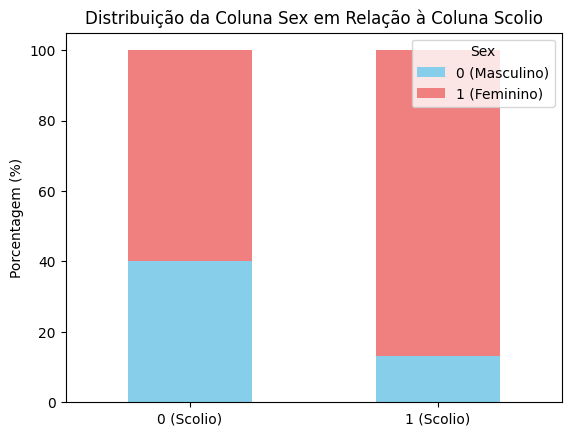

In [ ]:

# Calculando a distribuição de Sex em relação a Scolio
distribuicao_sex_scolio = df.groupby(['Scolio', 'Sex']).size().unstack(fill_value=0)

# Convertendo para porcentagem
distribuicao_sex_scolio_perc = distribuicao_sex_scolio.div(distribuicao_sex_scolio.sum(axis=1), axis=0) * 100

# Mapear os valores binários para rótulos
distribuicao_sex_scolio_perc.index = ['0 (Scolio)', '1 (Scolio)']
distribuicao_sex_scolio_perc.columns = ['0 (Masculino)', '1 (Feminino)']  # Ajuste conforme necessário

# Plotando o gráfico de barras empilhadas para a distribuição de Sex dentro de cada valor de Scolio
plt.figure(figsize=(10, 6))
distribuicao_sex_scolio_perc.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição da Coluna Sex em Relação à Coluna Scolio')
plt.legend(title='Sex')
plt.xticks(rotation=0)
plt.show()




# Replicação da tese do professor Fabian





Nossa linha de atividades antes da replicação incluiu o processo de anonimização dos dados brutos das amostragens de cada paciente, dados os quais nao foram utilizados ainda, tambem foi testado a normalização desses dados ao transforma-los em imagens para identificar a maneira a qual não se perde informações e ainda esta indefinida.

Para realização da entrega, tentamos replicar os parâmetros e métodos utilizados na tese do professor Fabian Rodrigo Castro Forero (disponivel em: https://repositorio.unesp.br/items/153798ea-a515-4313-8302-a8f59bf1e127)

O trabalho buscou replicar os resultados já existentes na bibliografia.

Na tese utilizou-se calculos de certa complexidade para encontrar os melhores metodos e hiperparamentros, ao tentar replicar interpretamos que foi utilizado uma RNA MLP de topologia [30-44-1] utilizando trainscg com otimizador e com relação aos dados, entendeu-se que foi utilizado apenas os primeiros 70 atributos do dataset que continha 147 atributos, para separação dos dados pra treino utilizou-se o metodo de Kfold com K = 5.

Para replicar, utilizamos o ScikitLearn, e ajustamos os parametros da MLPClassifier com a topologia (30,44,1) e utilizou-se o solver SGD, tambem foi utilizado o Kfold com K=5.

Nesse processo foi tentado utilizar um modelo na biblioteca do tensorflow porem apos algumas verificaçoes optou-se por adotar o modelo no sklearn. Para proximos passos pretendemos tentar aplicar o metodo de group kfold visto que muitos dados tem similaridade por serem de um mesmo paciente, assim planeja-se agrupar de acordo com o paciente e separar os dados levando isso em conta para evitar enviesamento. Tambem será explorado outros metodos para analise e aprendizado utilizando os dados brutos.

Acreditamos que é sim possível entregar o que foi prometido no documento da proposta, que foi de melhorar a acurácia do trabalho base.

In [ ]:
#Manipulando os dados

# Carregar os dados da planilha com cabeçalhos
#file_path = '/content/drive/MyDrive/tab_features_LIM.xlsx'
file_path = r'C:\Users\Cabas\Desktop\trabalho_ia\tab_features_LIM.xlsx'
df = pd.read_excel(file_path, header=0)
df = df.drop(axis='columns', labels=['Name', 'L_Handed', 'Male'])
df = df.rename(columns={'Female': 'Sex', 'R_Handed':'Handness'})
df = df.iloc[:, 1:]
print(df)

In [ ]:
print(df.info)

# Separar as features 70 primeiros atributos e o label
X = df.iloc[:, :70].values
y = df.iloc[:, -1].values

# Converter labels para c1 e c2
y = np.where(y < 10, 0, 1)  # c1 = 0, c2 = 1
print(X)
print(y)

<bound method DataFrame.info of      Age  Mass  Height  Sex  Handness   CoP_ML    CoP_AP  OE_T_Disp  \
0     59  67.0    1.60    1         1 -16.0122  185.1922   244.1792   
1     59  67.0    1.60    1         1  -7.9472  187.3671   196.1783   
2     59  67.0    1.60    1         1  -6.2638  191.7445   146.3464   
3     11  45.0    1.55    1         1  12.3376  200.9589   164.7609   
4     17  49.9    1.57    1         1   7.5364  187.0647   177.5941   
..   ...   ...     ...  ...       ...      ...       ...        ...   
144   14  80.7    1.62    1         1   3.4477  218.3915   126.4907   
145   13  66.7    1.57    0         1  -3.8503  185.0278    78.8369   
146   12  51.0    1.65    1         1  -2.6673  191.2708   180.8285   
147   72  38.0    1.50    1         1 -11.4396  209.2997   207.6702   
148   50  71.0    1.60    1         1  -9.9823  193.3489   347.2491   

     OE_Disp_ML  OE_Disp_AP  ...  s111  s112  s113  s114  s115  s116  s117  \
0      143.6967    170.9334  ...     

In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Listas para armazenar as acurácias de cada fold
train_accuracies = []
test_accuracies = []
balanced_train_accuracies = []
balanced_test_accuracies = []
confusion_matrices = []

# Definir o K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Definir o número de épocas
n_epochs = 3000

# Loop sobre os folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Definir o modelo MLP para cada fold
    model = MLPClassifier(hidden_layer_sizes=(30,44,1), activation='relu', solver='sgd', max_iter=n_epochs, warm_start=True, random_state=0)

    fold_train_accuracies = []
    fold_test_accuracies = []
    fold_balanced_train_accuracies = []
    fold_balanced_test_accuracies = []

    for epoch in tqdm(range(n_epochs), desc=f"Training fold"):
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        balanced_train_accuracy = balanced_accuracy_score(y_train, model.predict(X_train))
        balanced_test_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))

        fold_train_accuracies.append(train_accuracy)
        fold_test_accuracies.append(test_accuracy)
        fold_balanced_train_accuracies.append(balanced_train_accuracy)
        fold_balanced_test_accuracies.append(balanced_test_accuracy)

    train_accuracies.append(fold_train_accuracies)
    test_accuracies.append(fold_test_accuracies)
    balanced_train_accuracies.append(fold_balanced_train_accuracies)
    balanced_test_accuracies.append(fold_balanced_test_accuracies)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    print(f'Fold Train Accuracy: {fold_train_accuracies[-1]:.4f}, Fold Test Accuracy: {fold_test_accuracies[-1]:.4f}')
    print(f'Fold Balanced Train Accuracy: {fold_balanced_train_accuracies[-1]:.4f}, Fold Balanced Test Accuracy: {fold_balanced_test_accuracies[-1]:.4f}')
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n{conf_matrix}\n')

# Calcular a acurácia média e desvio padrão na última época
final_train_accuracies = [acc[-1] for acc in train_accuracies]
final_test_accuracies = [acc[-1] for acc in test_accuracies]
final_balanced_train_accuracies = [acc[-1] for acc in balanced_train_accuracies]
final_balanced_test_accuracies = [acc[-1] for acc in balanced_test_accuracies]

mean_train_accuracy = np.mean(final_train_accuracies)
std_train_accuracy = np.std(final_train_accuracies)
mean_test_accuracy = np.mean(final_test_accuracies)
std_test_accuracy = np.std(final_test_accuracies)

mean_balanced_train_accuracy = np.mean(final_balanced_train_accuracies)
std_balanced_train_accuracy = np.std(final_balanced_train_accuracies)
mean_balanced_test_accuracy = np.mean(final_balanced_test_accuracies)
std_balanced_test_accuracy = np.std(final_balanced_test_accuracies)

print(f'\nMean Train Accuracy: {mean_train_accuracy:.4f} ± {std_train_accuracy:.4f}')
print(f'Mean Test Accuracy: {mean_test_accuracy:.4f} ± {std_test_accuracy:.4f}')
print(f'Mean Balanced Train Accuracy: {mean_balanced_train_accuracy:.4f} ± {std_balanced_train_accuracy:.4f}')
print(f'Mean Balanced Test Accuracy: {mean_balanced_test_accuracy:.4f} ± {std_balanced_test_accuracy:.4f}')

aggregated_conf_matrix = np.mean(confusion_matrices, axis=0)
print(f'Aggregated Confusion Matrix:\n{aggregated_conf_matrix}')

Training fold: 100%|██████████| 3000/3000 [00:28<00:00, 104.44it/s]


Fold Train Accuracy: 0.9748, Fold Test Accuracy: 0.6667
Fold Balanced Train Accuracy: 0.9808, Fold Balanced Test Accuracy: 0.4762
Confusion Matrix for Fold 1:
[[ 0  9]
 [ 1 20]]



Training fold: 100%|██████████| 3000/3000 [00:34<00:00, 86.00it/s] 


Fold Train Accuracy: 0.9832, Fold Test Accuracy: 0.7333
Fold Balanced Train Accuracy: 0.9878, Fold Balanced Test Accuracy: 0.7014
Confusion Matrix for Fold 2:
[[ 6  7]
 [ 1 16]]



Training fold: 100%|██████████| 3000/3000 [00:30<00:00, 98.48it/s] 


Fold Train Accuracy: 0.9664, Fold Test Accuracy: 0.7667
Fold Balanced Train Accuracy: 0.9759, Fold Balanced Test Accuracy: 0.7545
Confusion Matrix for Fold 3:
[[ 8  6]
 [ 1 15]]



Training fold: 100%|██████████| 3000/3000 [00:32<00:00, 92.83it/s] 


Fold Train Accuracy: 0.6387, Fold Test Accuracy: 0.7667
Fold Balanced Train Accuracy: 0.5000, Fold Balanced Test Accuracy: 0.5000
Confusion Matrix for Fold 4:
[[ 0  7]
 [ 0 23]]



Training fold: 100%|██████████| 3000/3000 [00:27<00:00, 107.69it/s]

Fold Train Accuracy: 0.9583, Fold Test Accuracy: 0.8621
Fold Balanced Train Accuracy: 0.9675, Fold Balanced Test Accuracy: 0.8604
Confusion Matrix for Fold 5:
[[ 6  1]
 [ 3 19]]


Mean Train Accuracy: 0.9043 ± 0.1331
Mean Test Accuracy: 0.7591 ± 0.0631
Mean Balanced Train Accuracy: 0.8824 ± 0.1913
Mean Balanced Test Accuracy: 0.6585 ± 0.1484
Aggregated Confusion Matrix:
[[ 4.   6. ]
 [ 1.2 18.6]]



# Replicação da tese do professor Fabian (Utilizando RandomUnderSampler)





Nessa célula, tentamos replicar os parâmetros e metodos utilizados na tese do professor Fabian Rodrigo Castro Forero (disponivel em: https://repositorio.unesp.br/items/153798ea-a515-4313-8302-a8f59bf1e127). Com a adição da função RandomUnderSampler, da biblioteca sklearn. Essa função balanceia os treinos de acordo com a classe de menor tamanho, mantendo uma proporção de igualdade dentro dos treinamentos do modelo. Mesmo com a adição da função RandomUnderSampler, não houve melhora na acurácia.

In [ ]:
#Manipulando os dados

# Carregar os dados da planilha com cabeçalhos
file_path = '/content/drive/MyDrive/tab_features_LIM.xlsx'
#file_path = r'C:\Users\Cabas\Desktop\trabalho_ia\tab_features_LIM.xlsx'
df = pd.read_excel(file_path, header=0)
df = df.drop(axis='columns', labels=['Name', 'L_Handed', 'Male'])
df = df.rename(columns={'Female': 'Sex', 'R_Handed':'Handness'})
df = df.iloc[:, 1:]
print(df)

In [ ]:
X = df.iloc[:, :70].values
y = df.iloc[:, -1].values
# Converter labels para c1 e c2
y = np.where(y < 10, 0, 1)  # c1 = 0, c2 = 1

In [ ]:
# Padronizar os dados

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from tqdm import tqdm

# Listas para armazenar as acurácias de cada fold
train_accuracies = []
test_accuracies = []
balanced_train_accuracies = []
balanced_test_accuracies = []
confusion_matrices = []

# Definir o K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Definir o número de épocas
n_epochs = 3000

# Loop sobre os folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



    # Aplicar o RandomUnderSampler no conjunto de treinamento para balancear as classes 50% cada
    rus = RandomUnderSampler()
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

    # Definir o modelo MLP para cada fold
    model = MLPClassifier(hidden_layer_sizes=(30, 44, 1), activation='relu', solver='sgd', max_iter=n_epochs, warm_start=True, random_state=0)

    fold_train_accuracies = []
    fold_test_accuracies = []
    fold_balanced_train_accuracies = []
    fold_balanced_test_accuracies = []

    for epoch in tqdm(range(n_epochs), desc=f"Training fold"):
        model.fit(X_train_resampled, y_train_resampled)
        train_accuracy = accuracy_score(y_train_resampled, model.predict(X_train_resampled))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        balanced_train_accuracy = balanced_accuracy_score(y_train_resampled, model.predict(X_train_resampled))
        balanced_test_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))

        fold_train_accuracies.append(train_accuracy)
        fold_test_accuracies.append(test_accuracy)
        fold_balanced_train_accuracies.append(balanced_train_accuracy)
        fold_balanced_test_accuracies.append(balanced_test_accuracy)

    train_accuracies.append(fold_train_accuracies)
    test_accuracies.append(fold_test_accuracies)
    balanced_train_accuracies.append(fold_balanced_train_accuracies)
    balanced_test_accuracies.append(fold_balanced_test_accuracies)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    print(f'Fold Train Accuracy: {fold_train_accuracies[-1]:.4f}, Fold Test Accuracy: {fold_test_accuracies[-1]:.4f}')
    print(f'Fold Balanced Train Accuracy: {fold_balanced_train_accuracies[-1]:.4f}, Fold Balanced Test Accuracy: {fold_balanced_test_accuracies[-1]:.4f}')
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n{conf_matrix}\n')

# Calcular a acurácia média e desvio padrão na última época
final_train_accuracies = [acc[-1] for acc in train_accuracies]
final_test_accuracies = [acc[-1] for acc in test_accuracies]
final_balanced_train_accuracies = [acc[-1] for acc in balanced_train_accuracies]
final_balanced_test_accuracies = [acc[-1] for acc in balanced_test_accuracies]

mean_train_accuracy = np.mean(final_train_accuracies)
std_train_accuracy = np.std(final_train_accuracies)
mean_test_accuracy = np.mean(final_test_accuracies)
std_test_accuracy = np.std(final_test_accuracies)

mean_balanced_train_accuracy = np.mean(final_balanced_train_accuracies)
std_balanced_train_accuracy = np.std(final_balanced_train_accuracies)
mean_balanced_test_accuracy = np.mean(final_balanced_test_accuracies)
std_balanced_test_accuracy = np.std(final_balanced_test_accuracies)

print(f'\nMean Train Accuracy: {mean_train_accuracy:.4f} ± {std_train_accuracy:.4f}')
print(f'Mean Test Accuracy: {mean_test_accuracy:.4f} ± {std_test_accuracy:.4f}')
print(f'Mean Balanced Train Accuracy: {mean_balanced_train_accuracy:.4f} ± {std_balanced_train_accuracy:.4f}')
print(f'Mean Balanced Test Accuracy: {mean_balanced_test_accuracy:.4f} ± {std_balanced_test_accuracy:.4f}')

aggregated_conf_matrix = np.mean(confusion_matrices, axis=0)
print(f'Aggregated Confusion Matrix:\n{aggregated_conf_matrix}')

Training fold: 100%|██████████| 3000/3000 [00:22<00:00, 133.68it/s]


Fold Train Accuracy: 0.8659, Fold Test Accuracy: 0.5333
Fold Balanced Train Accuracy: 0.8659, Fold Balanced Test Accuracy: 0.4762
Confusion Matrix for Fold 1:
[[ 3  6]
 [ 8 13]]



Training fold: 100%|██████████| 3000/3000 [00:19<00:00, 151.17it/s]


Fold Train Accuracy: 0.9324, Fold Test Accuracy: 0.6667
Fold Balanced Train Accuracy: 0.9324, Fold Balanced Test Accuracy: 0.6516
Confusion Matrix for Fold 2:
[[ 7  6]
 [ 4 13]]



Training fold: 100%|██████████| 3000/3000 [00:21<00:00, 137.45it/s]


Fold Train Accuracy: 0.9861, Fold Test Accuracy: 0.7333
Fold Balanced Train Accuracy: 0.9861, Fold Balanced Test Accuracy: 0.7366
Confusion Matrix for Fold 3:
[[11  3]
 [ 5 11]]



Training fold: 100%|██████████| 3000/3000 [00:19<00:00, 157.08it/s]


Fold Train Accuracy: 0.7093, Fold Test Accuracy: 0.4000
Fold Balanced Train Accuracy: 0.7093, Fold Balanced Test Accuracy: 0.4099
Confusion Matrix for Fold 4:
[[ 3  4]
 [14  9]]



Training fold: 100%|██████████| 3000/3000 [00:18<00:00, 159.93it/s]

Fold Train Accuracy: 0.5000, Fold Test Accuracy: 0.7586
Fold Balanced Train Accuracy: 0.5000, Fold Balanced Test Accuracy: 0.5000
Confusion Matrix for Fold 5:
[[ 0  7]
 [ 0 22]]


Mean Train Accuracy: 0.7987 ± 0.1759
Mean Test Accuracy: 0.6184 ± 0.1343
Mean Balanced Train Accuracy: 0.7987 ± 0.1759
Mean Balanced Test Accuracy: 0.5549 ± 0.1205
Aggregated Confusion Matrix:
[[ 4.8  5.2]
 [ 6.2 13.6]]


# Replicação do artigo da scielo

Para realização da entrega, tentamos replicar os parametros e metrodos utilizados no artigo: Evaluation of scoliosis using baropodometer and artificial neural network (disponivel em: https://www.scielo.br/j/reng/a/VdCTSzkbq7BMqcKW5Y9xGck/?lang=en&format=html#);

Nesse modelo, utilizamos somente os dados coletados dos sensores baropodometros, 120 atributos que correspondem aos 120 sensores dos dois baropodometros, em uma single layer perceptron (SLP);

Realizamos a divisão entre treino e teste nas proporções 80%/20%, sendo 80% para treino e 20% para teste;


In [ ]:
file_path = '/content/drive/MyDrive/Planilha_sensores.xlsx'
df = pd.read_excel(file_path)
print(df)

In [ ]:

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

# Converter labels para c1 e c2
y = np.where(y < 10, 0, 1)  # c1 = 0, c2 = 1

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np

# Supondo que você já tenha o dataset X e y
# X, y = datasets.load_iris(return_X_y=True)  # Exemplo de como carregar um dataset

# Criando o classificador Perceptron
perceptron = Perceptron()

# Configurando o K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para armazenar as acurácias balanceadas
balanced_accuracies = []

# Realizando o K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinamento do modelo
    perceptron.fit(X_train, y_train)

    # Fazendo previsões nos dados de teste
    y_pred = perceptron.predict(X_test)

    # Calculando a acurácia balanceada do modelo
    accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracies.append(accuracy)

    # Imprimindo a acurácia balanceada e a matriz de confusão para cada fold
    print(f'Fold {fold}: Acurácia Balanceada = {accuracy * 100:.2f}%')
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

# Média e desvio padrão das acurácias balanceadas
mean_accuracy = np.mean(balanced_accuracies)
std_accuracy = np.std(balanced_accuracies)

print(f'Média da Acurácia Balanceada: {mean_accuracy * 100:.2f}%')
print(f'Desvio Padrão da Acurácia: {std_accuracy * 100:.2f}%')


Fold 1: Acurácia Balanceada = 47.62%
Matriz de Confusão:
 [[ 3  6]
 [ 8 13]]
------------------------------
Fold 2: Acurácia Balanceada = 50.79%
Matriz de Confusão:
 [[ 4  5]
 [ 9 12]]
------------------------------
Fold 3: Acurácia Balanceada = 67.50%
Matriz de Confusão:
 [[ 7  3]
 [ 7 13]]
------------------------------
Fold 4: Acurácia Balanceada = 60.61%
Matriz de Confusão:
 [[ 6  5]
 [ 6 12]]
------------------------------
Fold 5: Acurácia Balanceada = 50.51%
Matriz de Confusão:
 [[ 5  6]
 [ 8 10]]
------------------------------
Média da Acurácia Balanceada: 55.40%
Desvio Padrão da Acurácia: 7.47%


# SVM


In [ ]:
file_path = '/content/drive/MyDrive/Planilha_sensores.xlsx'
df = pd.read_excel(file_path)
print(df)

In [ ]:

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

# Converter labels para c1 e c2
y = np.where(y < 10, 0, 1)  # c1 = 0, c2 = 1

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np

# Criando o classificador SVM
svm_classifier = SVC(kernel='linear')

# Configurando o K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para armazenar as acurácias balanceadas
balanced_accuracies = []

# Realizando o K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinando o classificador
    svm_classifier.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = svm_classifier.predict(X_test)

    # Avaliando o classificador
    accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracies.append(accuracy)

    # Imprimindo a acurácia balanceada e a matriz de confusão para cada fold
    print(f'Fold {fold}: Acurácia Balanceada = {accuracy * 100:.2f}%')
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

# Média e desvio padrão das acurácias balanceadas
mean_accuracy = np.mean(balanced_accuracies)
std_accuracy = np.std(balanced_accuracies)

print(f'Média da Acurácia Balanceada: {mean_accuracy * 100:.2f}% +- {std_accuracy * 100:.2f}')


Fold 1: Acurácia Balanceada = 73.81%
Matriz de Confusão:
 [[ 6  3]
 [ 4 17]]
------------------------------
Fold 2: Acurácia Balanceada = 46.03%
Matriz de Confusão:
 [[ 4  5]
 [11 10]]
------------------------------
Fold 3: Acurácia Balanceada = 72.50%
Matriz de Confusão:
 [[ 7  3]
 [ 5 15]]
------------------------------
Fold 4: Acurácia Balanceada = 58.84%
Matriz de Confusão:
 [[ 5  6]
 [ 5 13]]
------------------------------
Fold 5: Acurácia Balanceada = 50.51%
Matriz de Confusão:
 [[ 5  6]
 [ 8 10]]
------------------------------
Média da Acurácia Balanceada: 60.34% +- 11.25


# Proposta que agrupa as amostras de pacientes

In [ ]:
#Manipulando os dados

file_path = '/content/drive/MyDrive/tab_features_LIM_mapped.xlsx'
#file_path = r'C:\Users\Cabas\Desktop\trabalho_ia\tab_features_LIM_mapped.xlsx'
df = pd.read_excel(file_path, header=0)
df = df.drop(axis='columns', labels=['Name', 'L_Handed', 'Male'])
df = df.rename(columns={'Female': 'Sex', 'R_Handed':'Handness'})
df = df.iloc[:, 1:]
print(df)

In [ ]:
#Separar as features (120 valores de sensores) e os labels e os groups
X = df.iloc[:, 1:71].values
y = df.iloc[:, -1].values
groups = df.iloc[:, 0].values

#Converter labels para c1 e c2
y = np.where(y < 10, 0, 1)  # c1 = 0, c2 = 1

infocheck = np.array(X)
infocheck.shape

print(X)
print(y)
print(groups)

In [ ]:
#Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
sgkf = StratifiedGroupKFold(n_splits=5)

# Armazenar as contagens de classes para cada fold
fold_class_counts = []
fold_number = 1

# Executar o GroupKFold
for fold, (train_idx, test_idx) in enumerate(sgkf.split(X, y, groups)):
    print(f"Fold {fold_number}")
    print("Train Groups:", set(groups[train_index]))
    print("Test Groups:", set(groups[test_index]))
    fold_number += 1
    # Contar as classes no conjunto de treinamento e teste
    train_classes, train_counts = np.unique(y[train_idx], return_counts=True)
    test_classes, test_counts = np.unique(y[test_idx], return_counts=True)

    print(f"Fold {fold + 1}")
    print(" Treino - Distribuição das Classes:")
    for cls, count in zip(train_classes, train_counts):
        print(f"   Classe {cls}: {count} ({count / len(train_idx):.2%})")

    print(" Teste - Distribuição das Classes:")
    for cls, count in zip(test_classes, test_counts):
        print(f"   Classe {cls}: {count} ({count / len(test_idx):.2%})")

    fold_class_counts.append((train_counts, test_counts))

# Agora você tem as contagens de classes por fold e pode avaliar o balanceamento.

Fold 1
Train Groups: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 59, 60, 61}
Test Groups: {3, 7, 8, 9, 13, 17, 21, 25, 26, 27, 29, 30, 32, 37, 38, 42, 43, 47, 52, 55, 58}
Fold 1
 Treino - Distribuição das Classes:
   Classe 0: 40 (33.61%)
   Classe 1: 79 (66.39%)
 Teste - Distribuição das Classes:
   Classe 0: 10 (33.33%)
   Classe 1: 20 (66.67%)
Fold 2
Train Groups: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 59, 60, 61}
Test Groups: {3, 7, 8, 9, 13, 17, 21, 25, 26, 27, 29, 30, 32, 37, 38, 42, 43, 47, 52, 55, 58}
Fold 2
 Treino - Distribuição das Classes:
   Classe 0: 40 (33.61%)
   Classe 1: 79 (66.39%)
 Teste - Distribuição das Classes:
   Classe 0: 10 (33.33%)
   Classe

In [ ]:
#Listas para armazenar as acurácias de cada fold
balanced_train_accuracies = []
balanced_test_accuracies = []
confusion_matrices = []

#Definir o número de épocas
n_epochs = 3000

#Loop sobre os folds
for train_index, test_index in sgkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Definir o modelo MLP para cada fold
    model = MLPClassifier(hidden_layer_sizes=(30,44,1), activation='relu', solver='sgd', max_iter=n_epochs, warm_start=True, random_state=0)

    fold_balanced_train_accuracies = []
    fold_balanced_test_accuracies = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("using device：", device)

    for epoch in tqdm(range(n_epochs), desc=f"Training fold"):
        model.fit(X_train, y_train)
        balanced_train_accuracy = balanced_accuracy_score(y_train, model.predict(X_train))
        balanced_test_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))

        fold_balanced_train_accuracies.append(balanced_train_accuracy)
        fold_balanced_test_accuracies.append(balanced_test_accuracy)

    balanced_train_accuracies.append(fold_balanced_train_accuracies)
    balanced_test_accuracies.append(fold_balanced_test_accuracies)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    print(f'Fold Balanced Train Accuracy: {fold_balanced_train_accuracies[-1]:.4f}, Fold Balanced Test Accuracy: {fold_balanced_test_accuracies[-1]:.4f}')
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n{conf_matrix}\n')

# Calcular a acurácia média e desvio padrão na última época
final_balanced_train_accuracies = [acc[-1] for acc in balanced_train_accuracies]
final_balanced_test_accuracies = [acc[-1] for acc in balanced_test_accuracies]

mean_balanced_train_accuracy = np.mean(final_balanced_train_accuracies)
std_balanced_train_accuracy = np.std(final_balanced_train_accuracies)
mean_balanced_test_accuracy = np.mean(final_balanced_test_accuracies)
std_balanced_test_accuracy = np.std(final_balanced_test_accuracies)

print(f'Mean Balanced Train Accuracy: {mean_balanced_train_accuracy:.4f} ± {std_balanced_train_accuracy:.4f}')
print(f'Mean Balanced Test Accuracy: {mean_balanced_test_accuracy:.4f} ± {std_balanced_test_accuracy:.4f}')

aggregated_conf_matrix = np.mean(confusion_matrices, axis=0)
print(f'Aggregated Confusion Matrix:\n{aggregated_conf_matrix}')

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:18<00:00, 159.62it/s]


Fold Balanced Train Accuracy: 0.9937, Fold Balanced Test Accuracy: 0.4750
Confusion Matrix for Fold 1:
[[ 1  9]
 [ 3 17]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:18<00:00, 163.94it/s]


Fold Balanced Train Accuracy: 0.9873, Fold Balanced Test Accuracy: 0.5000
Confusion Matrix for Fold 2:
[[ 3  7]
 [ 6 14]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:18<00:00, 158.54it/s]


Fold Balanced Train Accuracy: 0.9937, Fold Balanced Test Accuracy: 0.4250
Confusion Matrix for Fold 3:
[[ 1  9]
 [ 5 15]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:16<00:00, 181.98it/s]


Fold Balanced Train Accuracy: 0.9875, Fold Balanced Test Accuracy: 0.5211
Confusion Matrix for Fold 4:
[[ 2  8]
 [ 3 16]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:17<00:00, 174.74it/s]

Fold Balanced Train Accuracy: 1.0000, Fold Balanced Test Accuracy: 0.4500
Confusion Matrix for Fold 5:
[[ 3  7]
 [ 8 12]]

Mean Balanced Train Accuracy: 0.9924 ± 0.0047
Mean Balanced Test Accuracy: 0.4742 ± 0.0343
Aggregated Confusion Matrix:
[[ 2.   8. ]
 [ 5.  14.8]]


In [ ]:
groupkf = GroupKFold(n_splits=5)

#Listas para armazenar as acurácias de cada fold
balanced_train_accuracies = []
balanced_test_accuracies = []
confusion_matrices = []

#Definir o número de épocas
n_epochs = 3000

#Loop sobre os folds
for train_index, test_index in groupkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Definir o modelo MLP para cada fold
    model = MLPClassifier(hidden_layer_sizes=(30,44,1), activation='relu', solver='sgd', max_iter=n_epochs, warm_start=True, random_state=0)

    fold_balanced_train_accuracies = []
    fold_balanced_test_accuracies = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("using device：", device)

    for epoch in tqdm(range(n_epochs), desc=f"Training fold"):
        model.fit(X_train, y_train)
        balanced_train_accuracy = balanced_accuracy_score(y_train, model.predict(X_train))
        balanced_test_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))

        fold_balanced_train_accuracies.append(balanced_train_accuracy)
        fold_balanced_test_accuracies.append(balanced_test_accuracy)

    balanced_train_accuracies.append(fold_balanced_train_accuracies)
    balanced_test_accuracies.append(fold_balanced_test_accuracies)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    print(f'Fold Balanced Train Accuracy: {fold_balanced_train_accuracies[-1]:.4f}, Fold Balanced Test Accuracy: {fold_balanced_test_accuracies[-1]:.4f}')
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n{conf_matrix}\n')

# Calcular a acurácia média e desvio padrão na última época
final_balanced_train_accuracies = [acc[-1] for acc in balanced_train_accuracies]
final_balanced_test_accuracies = [acc[-1] for acc in balanced_test_accuracies]

mean_balanced_train_accuracy = np.mean(final_balanced_train_accuracies)
std_balanced_train_accuracy = np.std(final_balanced_train_accuracies)
mean_balanced_test_accuracy = np.mean(final_balanced_test_accuracies)
std_balanced_test_accuracy = np.std(final_balanced_test_accuracies)

print(f'Mean Balanced Train Accuracy: {mean_balanced_train_accuracy:.4f} ± {std_balanced_train_accuracy:.4f}')
print(f'Mean Balanced Test Accuracy: {mean_balanced_test_accuracy:.4f} ± {std_balanced_test_accuracy:.4f}')

aggregated_conf_matrix = np.mean(confusion_matrices, axis=0)
print(f'Aggregated Confusion Matrix:\n{aggregated_conf_matrix}')

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:18<00:00, 158.92it/s]


Fold Balanced Train Accuracy: 0.9936, Fold Balanced Test Accuracy: 0.4286
Confusion Matrix for Fold 1:
[[ 0  9]
 [ 3 18]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:26<00:00, 112.04it/s]


Fold Balanced Train Accuracy: 0.9875, Fold Balanced Test Accuracy: 0.4665
Confusion Matrix for Fold 2:
[[ 1 10]
 [ 3 16]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:22<00:00, 131.77it/s]


Fold Balanced Train Accuracy: 0.9812, Fold Balanced Test Accuracy: 0.5311
Confusion Matrix for Fold 3:
[[ 3  8]
 [ 4 15]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:23<00:00, 127.23it/s]


Fold Balanced Train Accuracy: 0.9747, Fold Balanced Test Accuracy: 0.5750
Confusion Matrix for Fold 4:
[[ 3  7]
 [ 3 17]]

using device： cuda:0


Training fold: 100%|██████████| 3000/3000 [00:22<00:00, 130.44it/s]

Fold Balanced Train Accuracy: 1.0000, Fold Balanced Test Accuracy: 0.4361
Confusion Matrix for Fold 5:
[[ 2  7]
 [ 7 13]]

Mean Balanced Train Accuracy: 0.9874 ± 0.0089
Mean Balanced Test Accuracy: 0.4875 ± 0.0568
Aggregated Confusion Matrix:
[[ 1.8  8.2]
 [ 4.  15.8]]


# Treino so com os calculos

In [ ]:
#Manipulando os dados

file_path = '/content/drive/MyDrive/tab_features_LIM_mapped.xlsx'
#file_path = r'C:\Users\Cabas\Desktop\trabalho_ia\tab_features_LIM_mapped.xlsx'
df = pd.read_excel(file_path, header=0)
df = df.drop(axis='columns', labels=['Name', 'L_Handed', 'Male'])
df = df.rename(columns={'Female': 'Sex', 'R_Handed':'Handness'})
df = df.iloc[:, 1:]
print(df)

     Group  Age  Mass  Height  Sex  Handness   CoP_ML    CoP_AP  OE_T_Disp  \
0        0   59  67.0    1.60    1         1 -16.0122  185.1922   244.1792   
1        0   59  67.0    1.60    1         1  -7.9472  187.3671   196.1783   
2        0   59  67.0    1.60    1         1  -6.2638  191.7445   146.3464   
3        1   11  45.0    1.55    1         1  12.3376  200.9589   164.7609   
4        2   17  49.9    1.57    1         1   7.5364  187.0647   177.5941   
..     ...  ...   ...     ...  ...       ...      ...       ...        ...   
144     58   14  80.7    1.62    1         1   3.4477  218.3915   126.4907   
145     59   13  66.7    1.57    0         1  -3.8503  185.0278    78.8369   
146     60   12  51.0    1.65    1         1  -2.6673  191.2708   180.8285   
147     61   72  38.0    1.50    1         1 -11.4396  209.2997   207.6702   
148     30   50  71.0    1.60    1         1  -9.9823  193.3489   347.2491   

     OE_Disp_ML  ...  s111  s112  s113  s114  s115  s116  s117 

In [ ]:
#Separar as features (120 valores de sensores) e os labels e os groups
X = df.iloc[:, 1:28].values
y = df.iloc[:, -1].values
groups = df.iloc[:, 0].values

#Converter labels para c1 e c2
y = np.where(y < 10, 0, 1)  # c1 = 0, c2 = 1

infocheck = np.array(X)
infocheck.shape

print(X)
print(y)
print(groups)

In [ ]:
#Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
group_kfold = GroupKFold(n_splits=5)

fold_number = 1
for train_index, test_index in group_kfold.split(X, y, groups):
    print(f"Fold {fold_number}")
    print("Train Groups:", set(groups[train_index]))
    print("Test Groups:", set(groups[test_index]))
    fold_number += 1

Fold 1
Train Groups: {0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61}
Test Groups: {2, 3, 4, 34, 12, 16, 48, 51, 24, 57, 26, 30}
Fold 2
Train Groups: {2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 29, 30, 31, 32, 34, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Test Groups: {0, 1, 33, 35, 6, 7, 38, 42, 11, 23, 27, 28}
Fold 3
Train Groups: {0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Test Groups: {5, 37, 8, 41, 10, 43, 14, 15, 46, 49, 18, 22, 29}
Fold 4
Train Groups: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 4

In [ ]:
#Definir o Group K-Fold Cross-Validation
group_kf = GroupKFold(n_splits=5)

#Listas para armazenar as acurácias de cada fold
balanced_train_accuracies = []
balanced_test_accuracies = []
confusion_matrices = []

#Definir o número de épocas
n_epochs = 5000

#Loop sobre os folds
for train_index, test_index in group_kf.split(X, y, groups=groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Definir o modelo MLP para cada fold
    model = MLPClassifier(hidden_layer_sizes=(30,44,1), activation='relu', solver='sgd', max_iter=n_epochs, warm_start=True, random_state=0)

    fold_balanced_train_accuracies = []
    fold_balanced_test_accuracies = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("using device：", device)

    for epoch in tqdm(range(n_epochs), desc=f"Training fold"):
        model.fit(X_train, y_train)
        balanced_train_accuracy = balanced_accuracy_score(y_train, model.predict(X_train))
        balanced_test_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))

        fold_balanced_train_accuracies.append(balanced_train_accuracy)
        fold_balanced_test_accuracies.append(balanced_test_accuracy)

    balanced_train_accuracies.append(fold_balanced_train_accuracies)
    balanced_test_accuracies.append(fold_balanced_test_accuracies)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    print(f'Fold Balanced Train Accuracy: {fold_balanced_train_accuracies[-1]:.4f}, Fold Balanced Test Accuracy: {fold_balanced_test_accuracies[-1]:.4f}')
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n{conf_matrix}\n')

# Calcular a acurácia média e desvio padrão na última época
final_balanced_train_accuracies = [acc[-1] for acc in balanced_train_accuracies]
final_balanced_test_accuracies = [acc[-1] for acc in balanced_test_accuracies]

mean_balanced_train_accuracy = np.mean(final_balanced_train_accuracies)
std_balanced_train_accuracy = np.std(final_balanced_train_accuracies)
mean_balanced_test_accuracy = np.mean(final_balanced_test_accuracies)
std_balanced_test_accuracy = np.std(final_balanced_test_accuracies)

print(f'Mean Balanced Train Accuracy: {mean_balanced_train_accuracy:.4f} ± {std_balanced_train_accuracy:.4f}')
print(f'Mean Balanced Test Accuracy: {mean_balanced_test_accuracy:.4f} ± {std_balanced_test_accuracy:.4f}')

aggregated_conf_matrix = np.mean(confusion_matrices, axis=0)
print(f'Aggregated Confusion Matrix:\n{aggregated_conf_matrix}')

using device： cpu


Training fold: 100%|██████████| 5000/5000 [00:37<00:00, 131.82it/s]


Fold Balanced Train Accuracy: 0.9653, Fold Balanced Test Accuracy: 0.4630
Confusion Matrix for Fold 1:
[[ 1  2]
 [11 16]]

using device： cpu


Training fold: 100%|██████████| 5000/5000 [00:28<00:00, 173.51it/s]


Fold Balanced Train Accuracy: 0.5000, Fold Balanced Test Accuracy: 0.5000
Confusion Matrix for Fold 2:
[[ 0 11]
 [ 0 19]]

using device： cpu


Training fold: 100%|██████████| 5000/5000 [00:28<00:00, 174.85it/s]


Fold Balanced Train Accuracy: 0.5000, Fold Balanced Test Accuracy: 0.5000
Confusion Matrix for Fold 3:
[[ 0 10]
 [ 0 20]]

using device： cpu


Training fold: 100%|██████████| 5000/5000 [00:29<00:00, 171.81it/s]


Fold Balanced Train Accuracy: 0.5000, Fold Balanced Test Accuracy: 0.5000
Confusion Matrix for Fold 4:
[[ 0 15]
 [ 0 15]]

using device： cpu


Training fold: 100%|██████████| 5000/5000 [00:29<00:00, 169.69it/s]

Fold Balanced Train Accuracy: 0.9321, Fold Balanced Test Accuracy: 0.6439
Confusion Matrix for Fold 5:
[[ 5  6]
 [ 3 15]]

Mean Balanced Train Accuracy: 0.6795 ± 0.2201
Mean Balanced Test Accuracy: 0.5214 ± 0.0629
Aggregated Confusion Matrix:
[[ 1.2  8.8]
 [ 2.8 17. ]]


# CNN - Imagens Agrupadas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights, EfficientNet_B0_Weights
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score
import numpy as np
import os
from collections import defaultdict, Counter
from tqdm import tqdm

In [ ]:
# Transformações a serem aplicadas nas imagens
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionar as imagens para 224x224
    transforms.ToTensor(),  # Converter as imagens em tensores
])

# Carregar o dataset usando ImageFolder (assume que as pastas c1 e c2 estão dentro de data_dir)
data_dir = r'E:\Baropodometer_forces_images'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Definir parâmetros
batch_size = 32
num_epochs = 10
k_folds = 5  # Número de folds para validação cruzada


Label: c1


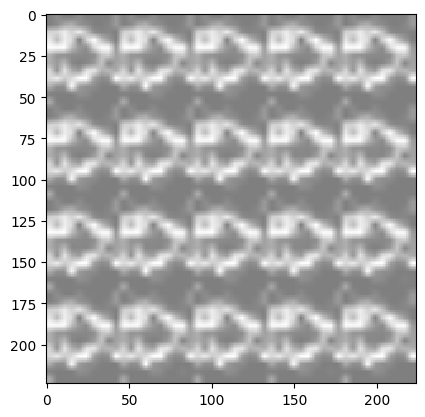

Label: c2


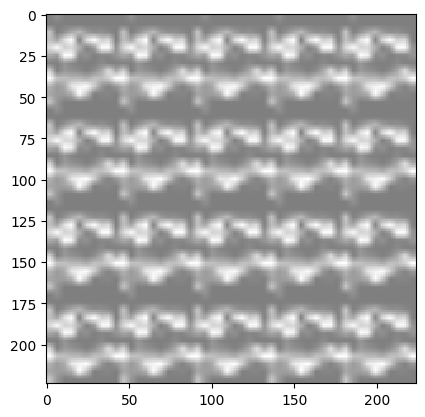

Label: c1


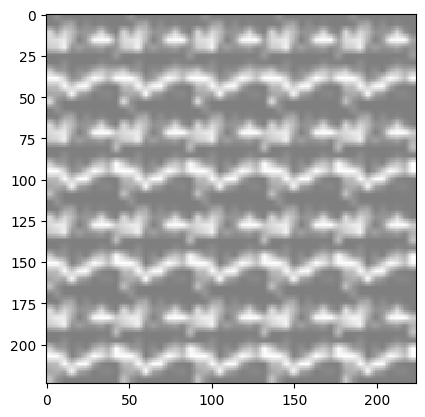

Label: c2


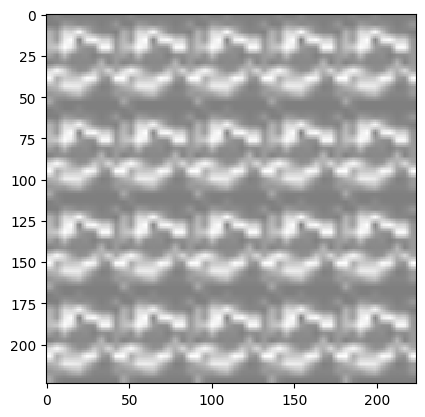

Tamanho do dataset: 8689 imagens


In [ ]:
# Carregar algumas amostras do DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Obter um batch de imagens
images, labels = next(iter(dataloader))

# Função para exibir imagens
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), interpolation='nearest')
    plt.show()

# Mostrar as imagens
for i in range(len(images)):
    print(f'Label: {dataset.classes[labels[i]]}')
    imshow(images[i])

# Verificar tamanho do dataset
print(f'Tamanho do dataset: {len(dataset)} imagens')

In [ ]:
# Verificar as classes atribuídas
print("Classes:", dataset.classes)

# Verificar alguns exemplos de labels
for idx, (path, label) in enumerate(dataset.imgs[700:800]):
    print(f"Path: {path}, Label: {label}")

In [ ]:
print(torch.cuda.is_available())  # Deve retornar True se uma GPU com CUDA estiver disponível
print(torch.cuda.device_count())  # Retorna o número de GPUs disponíveis
print(torch.cuda.get_device_name(0))  # Retorna o nome da GPU (se disponível)


True
1
NVIDIA GeForce GTX 1060 6GB


In [ ]:
# Agrupar imagens por indivíduo
individual_groups = defaultdict(list)
for idx, (path, _) in enumerate(dataset.imgs):
    filename = os.path.basename(path)
    print(filename)
    individual_id = filename.split('_')[1]  # Extrair o número do indivíduo
    individual_groups[individual_id].append(idx)

# Converter grupos para listas
individuals = list(individual_groups.values())
print(individuals)

In [ ]:
#RESNET50 SEM UNDERSAMPLING
# Definir o dispositivo (GPU se disponível)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Inicializar KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []

# Loop sobre cada fold
for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Contar a distribuição de classes nos conjuntos de treino e validação
    train_labels = [dataset.targets[idx] for idx in train_indices]
    val_labels = [dataset.targets[idx] for idx in val_indices]

    train_class_counts = Counter(train_labels)
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento: {train_class_counts}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # A última camada permanece treinável
    for param in model.fc.parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinamento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validação
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcular as métricas
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='binary')
    roc_auc = roc_auc_score(all_labels, all_probabilities)

    # Armazenar as métricas
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
    print(f'Balanced Accuracy: {balanced_acc:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')

In [ ]:
# RESNET50 COM UNDERSAMPLING
#  Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []

for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Obter os labels do conjunto de treino
    train_labels = [dataset.targets[idx] for idx in train_indices]

    # Dividir os índices em duas listas, uma para cada classe
    class_0_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 0]
    class_1_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 1]

    # Determinar o número de amostras na classe minoritária
    n_minority = min(len(class_0_indices), len(class_1_indices))

    # Realizar undersampling na classe majoritária para balancear as classes
    class_0_indices_resampled = resample(class_0_indices, replace=False, n_samples=n_minority, random_state=42)
    class_1_indices_resampled = resample(class_1_indices, replace=False, n_samples=n_minority, random_state=42)

    # Combinar as amostras resampled das duas classes
    train_indices_balanced = class_0_indices_resampled + class_1_indices_resampled

    # Agora, recalcular os labels após o undersampling
    train_labels_balanced = [dataset.targets[idx] for idx in train_indices_balanced]

    # Mostrar a nova distribuição das classes
    train_class_counts_balanced = Counter(train_labels_balanced)
    val_labels = [dataset.targets[idx] for idx in val_indices]
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento (balanceado): {train_class_counts_balanced}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices_balanced)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # A última camada permanece treinável
    for param in model.fc.parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinamento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validação
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcular as métricas
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='binary')
    roc_auc = roc_auc_score(all_labels, all_probabilities)

    # Armazenar as métricas
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
    print(f'Balanced Accuracy: {balanced_acc:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')


Fold 1/5
Distribuição de classes no treinamento (balanceado): Counter({0: 2162, 1: 2162})
Distribuição de classes na validação: Counter({1: 1817, 0: 513})


Epoch [1/10], Loss: 0.4123


Epoch [2/10], Loss: 0.2192


Epoch [3/10], Loss: 0.1558


Epoch [4/10], Loss: 0.1178


Epoch [5/10], Loss: 0.0953


Epoch [6/10], Loss: 0.0811


Epoch [7/10], Loss: 0.0687


Epoch [8/10], Loss: 0.0612


Epoch [9/10], Loss: 0.0547


Epoch [10/10], Loss: 0.0468
Validation Loss: 0.7002, Accuracy: 64.12%
Balanced Accuracy: 0.5720
F1-Score: 0.7515
ROC-AUC: 0.6115

Fold 2/5
Distribuição de classes no treinamento (balanceado): Counter({0: 1775, 1: 1775})
Distribuição de classes na validação: Counter({0: 900, 1: 694})


Epoch [1/10], Loss: 0.4366


Epoch [2/10], Loss: 0.2352


Epoch [3/10], Loss: 0.1621


Epoch [4/10], Loss: 0.1248


Epoch [5/10], Loss: 0.1038


Epoch [6/10], Loss: 0.0880


Epoch [7/10], Loss: 0.0733


Epoch [8/10], Loss: 0.0636


Epoch [9/10], Loss: 0.0596


Epoch [10/10], Loss: 0.0511
Validation Loss: 1.1179, Accuracy: 50.25%
Balanced Accuracy: 0.5448
F1-Score: 0.6041
ROC-AUC: 0.6437

Fold 3/5
Distribuição de classes no treinamento (balanceado): Counter({0: 2301, 1: 2301})
Distribuição de classes na validação: Counter({1: 759, 0: 374})


Epoch [1/10], Loss: 0.3733


Epoch [2/10], Loss: 0.1912


Epoch [3/10], Loss: 0.1374


Epoch [4/10], Loss: 0.1034


Epoch [5/10], Loss: 0.0837


Epoch [6/10], Loss: 0.0729


Epoch [7/10], Loss: 0.0613


Epoch [8/10], Loss: 0.0549


Epoch [9/10], Loss: 0.0469


Epoch [10/10], Loss: 0.0424
Validation Loss: 1.3776, Accuracy: 52.69%
Balanced Accuracy: 0.4577
F1-Score: 0.6519
ROC-AUC: 0.3391

Fold 4/5
Distribuição de classes no treinamento (balanceado): Counter({0: 2600, 1: 2600})
Distribuição de classes na validação: Counter({1: 1813, 0: 75})


Epoch [1/10], Loss: 0.3746


Epoch [2/10], Loss: 0.1807


Epoch [3/10], Loss: 0.1244


Epoch [4/10], Loss: 0.0927


Epoch [5/10], Loss: 0.0777


Epoch [6/10], Loss: 0.0670


Epoch [7/10], Loss: 0.0523


Epoch [8/10], Loss: 0.0458


Epoch [9/10], Loss: 0.0414


Epoch [10/10], Loss: 0.0367
Validation Loss: 0.7331, Accuracy: 66.95%
Balanced Accuracy: 0.3742
F1-Score: 0.8015
ROC-AUC: 0.3244

Fold 5/5
Distribuição de classes no treinamento (balanceado): Counter({0: 1862, 1: 1862})
Distribuição de classes na validação: Counter({1: 931, 0: 813})


Epoch [1/10], Loss: 0.4183


Epoch [2/10], Loss: 0.2144


Epoch [3/10], Loss: 0.1458


Epoch [4/10], Loss: 0.1100


Epoch [5/10], Loss: 0.0927


Epoch [6/10], Loss: 0.0757


Epoch [7/10], Loss: 0.0662


Epoch [8/10], Loss: 0.0590


Epoch [9/10], Loss: 0.0501


Epoch [10/10], Loss: 0.0453
Validation Loss: 1.4886, Accuracy: 51.32%
Balanced Accuracy: 0.4934
F1-Score: 0.6329
ROC-AUC: 0.5517

Resultados dos folds:
Média e desvio padrão da Acurácia: 57.07% ± 7.01
Média e desvio padrão da Acurácia Balanceada: 0.4884 ± 0.0695
Média e desvio padrão do F1-Score: 0.6884 ± 0.0752
Média e desvio padrão do ROC-AUC: 0.4941 ± 0.1359


In [ ]:
#EFFICIENT NET SEM UNDERSAMPLING

# Definir o dispositivo (GPU se disponível)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Inicializar KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []

# Loop sobre cada fold
for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Contar a distribuição de classes nos conjuntos de treino e validação
    train_labels = [dataset.targets[idx] for idx in train_indices]
    val_labels = [dataset.targets[idx] for idx in val_indices]

    train_class_counts = Counter(train_labels)
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento: {train_class_counts}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # Substituir a última camada do classifier
    num_ftrs = model.classifier[1].in_features  # Obter o número de entradas da camada Linear no classifier
    model.classifier[1] = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes desejadas

    # Descongelar a nova camada classifier
    for param in model.classifier[1].parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinamento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validação
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcular as métricas
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='binary')
    roc_auc = roc_auc_score(all_labels, all_probabilities)

    # Armazenar as métricas
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
    print(f'Balanced Accuracy: {balanced_acc:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')

In [ ]:
#EFFICIENT NET COM UNDERSAMPLING

# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []

for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Obter os labels do conjunto de treino
    train_labels = [dataset.targets[idx] for idx in train_indices]

    # Dividir os índices em duas listas, uma para cada classe
    class_0_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 0]
    class_1_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 1]

    # Determinar o número de amostras na classe minoritária
    n_minority = min(len(class_0_indices), len(class_1_indices))

    # Realizar undersampling na classe majoritária para balancear as classes
    class_0_indices_resampled = resample(class_0_indices, replace=False, n_samples=n_minority, random_state=42)
    class_1_indices_resampled = resample(class_1_indices, replace=False, n_samples=n_minority, random_state=42)

    # Combinar as amostras resampled das duas classes
    train_indices_balanced = class_0_indices_resampled + class_1_indices_resampled

    # Agora, recalcular os labels após o undersampling
    train_labels_balanced = [dataset.targets[idx] for idx in train_indices_balanced]

    # Mostrar a nova distribuição das classes
    train_class_counts_balanced = Counter(train_labels_balanced)
    val_labels = [dataset.targets[idx] for idx in val_indices]
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento (balanceado): {train_class_counts_balanced}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices_balanced)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # Substituir a última camada do classifier
    num_ftrs = model.classifier[1].in_features  # Obter o número de entradas da camada Linear no classifier
    model.classifier[1] = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes desejadas

    # Descongelar a nova camada classifier
    for param in model.classifier[1].parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinamento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validação
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcular as métricas
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='binary')
    roc_auc = roc_auc_score(all_labels, all_probabilities)

    # Armazenar as métricas
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
    print(f'Balanced Accuracy: {balanced_acc:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')

In [ ]:
# RESNET50 COM UNDERSAMPLING 30 EPOCAS

# Definir parâmetros
num_epochs = 30

#  Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []

epoch

for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Obter os labels do conjunto de treino
    train_labels = [dataset.targets[idx] for idx in train_indices]

    # Dividir os índices em duas listas, uma para cada classe
    class_0_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 0]
    class_1_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 1]

    # Determinar o número de amostras na classe minoritária
    n_minority = min(len(class_0_indices), len(class_1_indices))

    # Realizar undersampling na classe majoritária para balancear as classes
    class_0_indices_resampled = resample(class_0_indices, replace=False, n_samples=n_minority, random_state=42)
    class_1_indices_resampled = resample(class_1_indices, replace=False, n_samples=n_minority, random_state=42)

    # Combinar as amostras resampled das duas classes
    train_indices_balanced = class_0_indices_resampled + class_1_indices_resampled

    # Agora, recalcular os labels após o undersampling
    train_labels_balanced = [dataset.targets[idx] for idx in train_indices_balanced]

    # Mostrar a nova distribuição das classes
    train_class_counts_balanced = Counter(train_labels_balanced)
    val_labels = [dataset.targets[idx] for idx in val_indices]
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento (balanceado): {train_class_counts_balanced}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices_balanced)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # A última camada permanece treinável
    for param in model.fc.parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinamento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validação
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcular as métricas
    accuracy = 100 * correct / total
    balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='binary')
    roc_auc = roc_auc_score(all_labels, all_probabilities)

    # Armazenar as métricas
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
    print(f'Balanced Accuracy: {balanced_acc:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')

# CNN - Imagens Individuais



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights, EfficientNet_B0_Weights
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, confusion_matrix
import numpy as np
import os
from collections import defaultdict, Counter
from tqdm import tqdm

In [ ]:
# Transformações a serem aplicadas nas imagens
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar as imagens para 224x224
    transforms.ToTensor(),  # Converter as imagens em tensores
])

# Carregar o dataset usando ImageFolder (assume que as pastas c1 e c2 estão dentro de data_dir)
data_dir = r'E:\dataset'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Definir parâmetros
batch_size = 512
num_epochs = 5
k_folds = 5  # Número de folds para validação cruzada


Label: c2


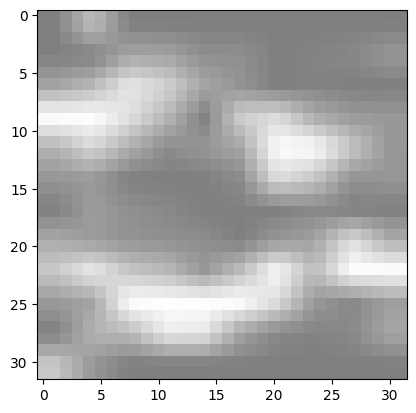

Label: c2


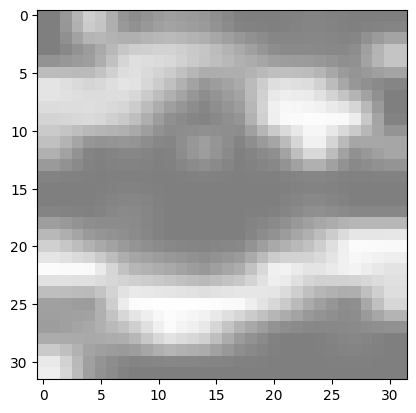

Label: c2


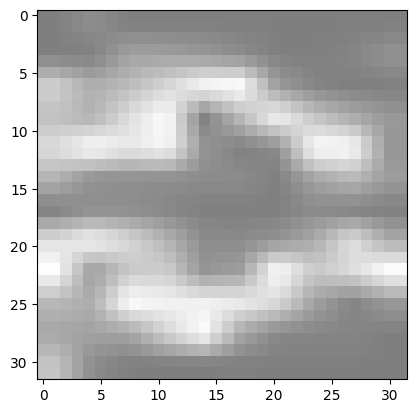

Label: c1


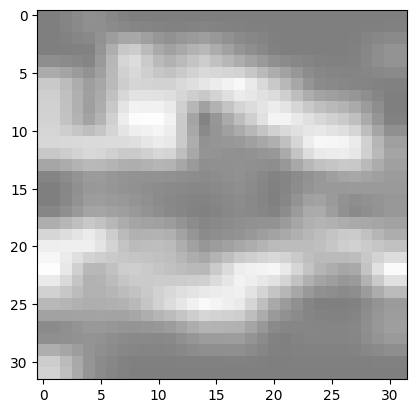

Tamanho do dataset: 358596 imagens


In [ ]:
# Carregar algumas amostras do DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Obter um batch de imagens
images, labels = next(iter(dataloader))

# Função para exibir imagens
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), interpolation='nearest')
    plt.show()

# Mostrar as imagens
for i in range(len(images)):
    print(f'Label: {dataset.classes[labels[i]]}')
    imshow(images[i])

# Verificar tamanho do dataset
print(f'Tamanho do dataset: {len(dataset)} imagens')

In [ ]:
# Verificar as classes atribuídas
print("Classes:", dataset.classes)

# Verificar alguns exemplos de labels
for idx, (path, label) in enumerate(dataset.imgs[50000:50100]):
    print(f"Path: {path}, Label: {label}")

In [ ]:
print(torch.cuda.is_available())  # Deve retornar True se uma GPU com CUDA estiver disponível
print(torch.cuda.device_count())  # Retorna o número de GPUs disponíveis
print(torch.cuda.get_device_name(0))  # Retorna o nome da GPU (se disponível)


True
1
NVIDIA GeForce GTX 1060 6GB


In [ ]:
# Agrupar imagens por indivíduo
individual_groups = defaultdict(list)
for idx, (path, _) in enumerate(dataset.imgs):
    filename = os.path.basename(path)
    print(filename)
    individual_id = filename.split('_')[2]  # Extrair o número do indivíduo
    individual_groups[individual_id].append(idx)

# Converter grupos para listas
individuals = list(individual_groups.values())
print(individuals)

In [ ]:
# Definir o dispositivo (GPU se disponível)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Inicializar KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

Using device: cuda:0


In [ ]:
# RESNET50 COM UNDERSAMPLING
# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []
confusion_matrices = []

# Listas para armazenar as perdas (losses) de cada fold
training_losses = []
validation_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Obter os labels do conjunto de treino
    train_labels = [dataset.targets[idx] for idx in train_indices]

    # Dividir os índices em duas listas, uma para cada classe
    class_0_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 0]
    class_1_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 1]

    # Determinar o número de amostras na classe minoritária
    n_minority = min(len(class_0_indices), len(class_1_indices))

    # Realizar undersampling na classe majoritária para balancear as classes
    class_0_indices_resampled = resample(class_0_indices, replace=False, n_samples=n_minority, random_state=42)
    class_1_indices_resampled = resample(class_1_indices, replace=False, n_samples=n_minority, random_state=42)

    # Combinar as amostras resampled das duas classes
    train_indices_balanced = class_0_indices_resampled + class_1_indices_resampled

    # Agora, recalcular os labels após o undersampling
    train_labels_balanced = [dataset.targets[idx] for idx in train_indices_balanced]

    # Mostrar a nova distribuição das classes
    train_class_counts_balanced = Counter(train_labels_balanced)
    val_labels = [dataset.targets[idx] for idx in val_indices]
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento (balanceado): {train_class_counts_balanced}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices_balanced)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    # Modificar a primeira camada para aceitar imagens de 32x32
    model.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # Descongelar a primeira camada alterada e a camada fully connected
    for param in model.conv1.parameters():
        param.requires_grad = True

    # A última camada permanece treinável
    for param in model.fc.parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Listas para armazenar as perdas por época
    fold_training_losses = []
    fold_validation_losses = []

    # Treinamento
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        # Armazenar a perda de treinamento da época atual
        fold_training_losses.append(running_loss/len(train_loader))

        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss/len(train_loader):.4f}')

        # Validação após cada época
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []
        all_probabilities = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                # Mover os dados para a GPU
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Armazenar a perda de validação da época atual
        fold_validation_losses.append(val_loss/len(val_loader))

        # Calcular as métricas
        accuracy = 100 * correct / total
        balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions, average='binary')
        roc_auc = roc_auc_score(all_labels, all_probabilities)

        print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
        print(f'Balanced Accuracy: {balanced_acc:.4f}')
        print(f'F1-Score: {f1:.4f}')
        print(f'ROC-AUC: {roc_auc:.4f}')

    # Calcular a matriz de confusão após o último epoch do fold
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    confusion_matrices.append(conf_matrix)

    # Armazenar as métricas finais do fold
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Armazenar as perdas de treinamento e validação para o fold
    training_losses.append(fold_training_losses)
    validation_losses.append(fold_validation_losses)

    print(f'Matriz de Confusão do Fold {fold + 1}:\n{conf_matrix}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')

# Calcular a matriz de confusão média
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'\nMatriz de Confusão Média:\n{mean_confusion_matrix}')



Fold 1/5
Distribuição de classes no treinamento (balanceado): Counter({0: 89169, 1: 89169})
Distribuição de classes na validação: Counter({1: 75377, 0: 20846})


Epoch [1/5], Training Loss: 0.1595
Validation Loss: 0.7607, Accuracy: 70.63%
Balanced Accuracy: 0.6111
F1-Score: 0.8061
ROC-AUC: 0.6567


Epoch [2/5], Training Loss: 0.0495
Validation Loss: 0.9285, Accuracy: 69.11%
Balanced Accuracy: 0.5808
F1-Score: 0.7972
ROC-AUC: 0.5915


Epoch [3/5], Training Loss: 0.0391
Validation Loss: 1.1128, Accuracy: 59.19%
Balanced Accuracy: 0.4643
F1-Score: 0.7258
ROC-AUC: 0.4935


Epoch [4/5], Training Loss: 0.0337
Validation Loss: 0.8890, Accuracy: 73.06%
Balanced Accuracy: 0.6600
F1-Score: 0.8202
ROC-AUC: 0.6984


Epoch [5/5], Training Loss: 0.0296
Validation Loss: 1.1241, Accuracy: 68.82%
Balanced Accuracy: 0.5637
F1-Score: 0.7974
ROC-AUC: 0.5755
Matriz de Confusão do Fold 1:
[[ 7172 13674]
 [16332 59045]]

Fold 2/5
Distribuição de classes no treinamento (balanceado): Counter({0: 73543, 1: 73543})
Distribuição de classes na validação: Counter({0: 36472, 1: 28701})


Epoch [1/5], Training Loss: 0.1665
Validation Loss: 1.7002, Accuracy: 45.93%
Balanced Accuracy: 0.5104
F1-Score: 0.6046
ROC-AUC: 0.5078


Epoch [2/5], Training Loss: 0.0612
Validation Loss: 1.6815, Accuracy: 43.70%
Balanced Accuracy: 0.4456
F1-Score: 0.4478
ROC-AUC: 0.4073


Epoch [3/5], Training Loss: 0.0674
Validation Loss: 3.0040, Accuracy: 39.56%
Balanced Accuracy: 0.4405
F1-Score: 0.5434
ROC-AUC: 0.3377


Epoch [4/5], Training Loss: 0.0513
Validation Loss: 2.2574, Accuracy: 41.21%
Balanced Accuracy: 0.4436
F1-Score: 0.5147
ROC-AUC: 0.4079


Epoch [5/5], Training Loss: 0.0280
Validation Loss: 2.9018, Accuracy: 41.04%
Balanced Accuracy: 0.4539
F1-Score: 0.5502
ROC-AUC: 0.4129
Matriz de Confusão do Fold 2:
[[ 3242 33230]
 [ 5196 23505]]

Fold 3/5
Distribuição de classes no treinamento (balanceado): Counter({0: 94563, 1: 94563})
Distribuição de classes na validação: Counter({1: 31227, 0: 15452})


Epoch [1/5], Training Loss: 0.1702
Validation Loss: 1.1436, Accuracy: 51.97%
Balanced Accuracy: 0.4688
F1-Score: 0.6331
ROC-AUC: 0.4727


Epoch [2/5], Training Loss: 0.0589
Validation Loss: 1.4526, Accuracy: 50.84%
Balanced Accuracy: 0.4803
F1-Score: 0.6052
ROC-AUC: 0.4608


Epoch [3/5], Training Loss: 0.0530
Validation Loss: 1.3973, Accuracy: 56.11%
Balanced Accuracy: 0.5101
F1-Score: 0.6683
ROC-AUC: 0.5143


Epoch [4/5], Training Loss: 0.0286
Validation Loss: 1.5244, Accuracy: 57.17%
Balanced Accuracy: 0.5288
F1-Score: 0.6720
ROC-AUC: 0.5338


Epoch [5/5], Training Loss: 0.0619
Validation Loss: 1.9056, Accuracy: 53.51%
Balanced Accuracy: 0.5148
F1-Score: 0.6232
ROC-AUC: 0.5149
Matriz de Confusão do Fold 3:
[[ 7029  8423]
 [13279 17948]]

Fold 4/5
Distribuição de classes no treinamento (balanceado): Counter({0: 106806, 1: 106806})
Distribuição de classes na validação: Counter({1: 74597, 0: 3209})


Epoch [1/5], Training Loss: 0.0695
Validation Loss: 1.1714, Accuracy: 60.22%
Balanced Accuracy: 0.5094
F1-Score: 0.7464
ROC-AUC: 0.5488


Epoch [2/5], Training Loss: 0.0114
Validation Loss: 1.6230, Accuracy: 51.42%
Balanced Accuracy: 0.3631
F1-Score: 0.6757
ROC-AUC: 0.4077


Epoch [3/5], Training Loss: 0.0108
Validation Loss: 1.7272, Accuracy: 51.39%
Balanced Accuracy: 0.3221
F1-Score: 0.6769
ROC-AUC: 0.3430


Epoch [4/5], Training Loss: 0.0107
Validation Loss: 1.7079, Accuracy: 59.79%
Balanced Accuracy: 0.3509
F1-Score: 0.7473
ROC-AUC: 0.2474


Epoch [5/5], Training Loss: 0.0078
Validation Loss: 1.4035, Accuracy: 62.47%
Balanced Accuracy: 0.3805
F1-Score: 0.7676
ROC-AUC: 0.4153
Matriz de Confusão do Fold 4:
[[  367  2842]
 [26361 48236]]

Fold 5/5
Distribuição de classes no treinamento (balanceado): Counter({0: 75979, 1: 75979})
Distribuição de classes na validação: Counter({1: 38679, 0: 34036})


Epoch [1/5], Training Loss: 0.1228
Validation Loss: 1.4496, Accuracy: 53.20%
Balanced Accuracy: 0.5177
F1-Score: 0.6276
ROC-AUC: 0.5634


Epoch [2/5], Training Loss: 0.0409
Validation Loss: 1.8355, Accuracy: 52.63%
Balanced Accuracy: 0.5084
F1-Score: 0.6391
ROC-AUC: 0.5457


Epoch [3/5], Training Loss: 0.0310
Validation Loss: 1.7695, Accuracy: 54.33%
Balanced Accuracy: 0.5245
F1-Score: 0.6562
ROC-AUC: 0.6156


Epoch [4/5], Training Loss: 0.0293
Validation Loss: 2.0616, Accuracy: 62.28%
Balanced Accuracy: 0.6028
F1-Score: 0.7208
ROC-AUC: 0.6619


Epoch [5/5], Training Loss: 0.0265
Validation Loss: 2.1069, Accuracy: 53.56%
Balanced Accuracy: 0.5177
F1-Score: 0.6461
ROC-AUC: 0.5773
Matriz de Confusão do Fold 5:
[[ 8112 25924]
 [ 7848 30831]]

Resultados dos folds:
Média e desvio padrão da Acurácia: 55.88% ± 9.40
Média e desvio padrão da Acurácia Balanceada: 0.4861 ± 0.0633
Média e desvio padrão do F1-Score: 0.6769 ± 0.0923
Média e desvio padrão do ROC-AUC: 0.4992 ± 0.0730

Matriz de Confusão Média:
[[ 5184.4 16818.6]
 [13803.2 35913. ]]


# CNN - Imagens Individuais - 1000 arquivos por amostra

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights, EfficientNet_B0_Weights
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, confusion_matrix
import numpy as np
import os
from collections import defaultdict, Counter
from tqdm import tqdm

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import os

# Diretório para salvar os logs do TensorBoard
log_dir = "logs/undersampling_resnet50_ajusted"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Inicializar o SummaryWriter
writer = SummaryWriter(log_dir=log_dir)


In [ ]:
# Transformações a serem aplicadas nas imagens
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar as imagens para 224x224
    transforms.ToTensor(),  # Converter as imagens em tensores
])

# Carregar o dataset usando ImageFolder (assume que as pastas c1 e c2 estão dentro de data_dir)
data_dir = r'E:\dataset2'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Definir parâmetros
batch_size = 128
num_epochs = 50
k_folds = 5  # Número de folds para validação cruzada


Label: c2


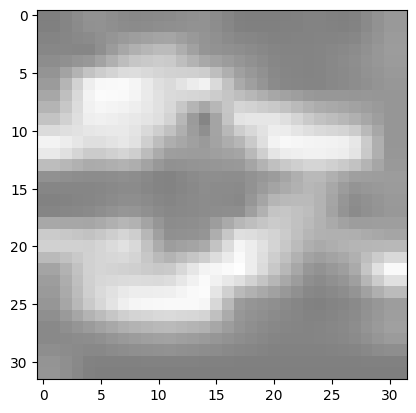

Label: c2


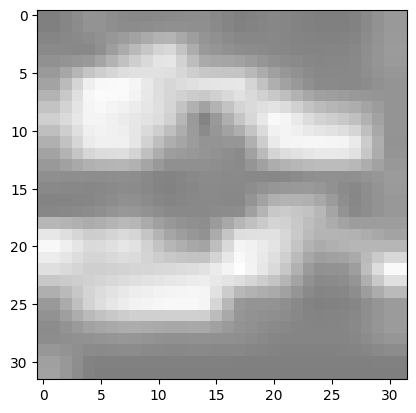

Label: c2


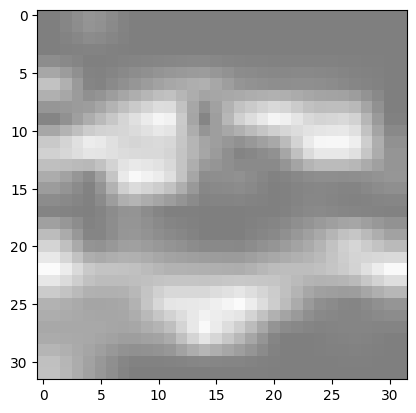

Label: c2


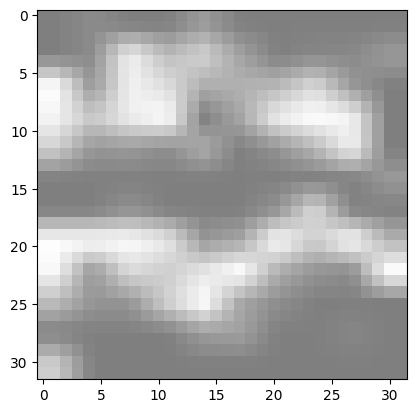

Tamanho do dataset: 140385 imagens


In [ ]:
# Carregar algumas amostras do DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Obter um batch de imagens
images, labels = next(iter(dataloader))

# Função para exibir imagens
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), interpolation='nearest')
    plt.show()

# Mostrar as imagens
for i in range(len(images)):
    print(f'Label: {dataset.classes[labels[i]]}')
    imshow(images[i])

# Verificar tamanho do dataset
print(f'Tamanho do dataset: {len(dataset)} imagens')

In [ ]:
# Verificar as classes atribuídas
print("Classes:", dataset.classes)

# Verificar alguns exemplos de labels
for idx, (path, label) in enumerate(dataset.imgs[50000:50100]):
    print(f"Path: {path}, Label: {label}")

In [ ]:
print(torch.cuda.is_available())  # Deve retornar True se uma GPU com CUDA estiver disponível
print(torch.cuda.device_count())  # Retorna o número de GPUs disponíveis
print(torch.cuda.get_device_name(0))  # Retorna o nome da GPU (se disponível)


True
1
NVIDIA GeForce GTX 1060 6GB


In [ ]:
# Agrupar imagens por indivíduo
individual_groups = defaultdict(list)
for idx, (path, _) in enumerate(dataset.imgs):
    filename = os.path.basename(path)
    print(filename)
    individual_id = filename.split('_')[2]  # Extrair o número do indivíduo
    individual_groups[individual_id].append(idx)

# Converter grupos para listas
individuals = list(individual_groups.values())
print(individuals)

In [ ]:
# Definir o dispositivo (GPU se disponível)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Inicializar KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

Using device: cuda:0


In [ ]:
# RESNET50 COM UNDERSAMPLING
# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []
confusion_matrices = []

# Listas para armazenar as perdas (losses) de cada fold
training_losses = []
validation_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    print(f'\nFold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Obter os labels do conjunto de treino
    train_labels = [dataset.targets[idx] for idx in train_indices]

    # Dividir os índices em duas listas, uma para cada classe
    class_0_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 0]
    class_1_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 1]

    # Determinar o número de amostras na classe minoritária
    n_minority = min(len(class_0_indices), len(class_1_indices))

    # Realizar undersampling na classe majoritária para balancear as classes
    class_0_indices_resampled = resample(class_0_indices, replace=False, n_samples=n_minority, random_state=42)
    class_1_indices_resampled = resample(class_1_indices, replace=False, n_samples=n_minority, random_state=42)

    # Combinar as amostras resampled das duas classes
    train_indices_balanced = class_0_indices_resampled + class_1_indices_resampled

    # Agora, recalcular os labels após o undersampling
    train_labels_balanced = [dataset.targets[idx] for idx in train_indices_balanced]

    # Mostrar a nova distribuição das classes
    train_class_counts_balanced = Counter(train_labels_balanced)
    val_labels = [dataset.targets[idx] for idx in val_indices]
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento (balanceado): {train_class_counts_balanced}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices_balanced)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    # Modificar a primeira camada para aceitar imagens de 32x32
    model.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # Descongelar a primeira camada alterada e a camada fully connected
    for param in model.conv1.parameters():
        param.requires_grad = True

    # A última camada permanece treinável
    for param in model.fc.parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00001)

    # Listas para armazenar as perdas por época
    fold_training_losses = []
    fold_validation_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        # Armazenar a perda de treinamento da época atual
        fold_training_losses.append(running_loss/len(train_loader))

        # Registrar a perda de treinamento no TensorBoard
        writer.add_scalar(f'Fold_{fold+1}/Training_Loss', running_loss/len(train_loader), epoch)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss/len(train_loader):.4f}')

        # Validação após cada época
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []
        all_probabilities = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                # Mover os dados para a GPU
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Armazenar a perda de validação da época atual
        fold_validation_losses.append(val_loss/len(val_loader))

        # Calcular as métricas
        accuracy = 100 * correct / total
        balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions, average='binary')
        roc_auc = roc_auc_score(all_labels, all_probabilities)

        print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
        print(f'Balanced Accuracy: {balanced_acc:.4f}')
        print(f'F1-Score: {f1:.4f}')
        print(f'ROC-AUC: {roc_auc:.4f}')

        # Registrar a perda e as métricas de validação no TensorBoard
        writer.add_scalar(f'Fold_{fold+1}/Validation_Loss', val_loss/len(val_loader), epoch)
        writer.add_scalar(f'Fold_{fold+1}/Accuracy', accuracy, epoch)
        writer.add_scalar(f'Fold_{fold+1}/Balanced_Accuracy', balanced_acc, epoch)
        writer.add_scalar(f'Fold_{fold+1}/F1_Score', f1, epoch)
        writer.add_scalar(f'Fold_{fold+1}/ROC_AUC', roc_auc, epoch)


    # Calcular a matriz de confusão após o último epoch do fold
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    confusion_matrices.append(conf_matrix)

    # Armazenar as métricas finais do fold
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Armazenar as perdas de treinamento e validação para o fold
    training_losses.append(fold_training_losses)
    validation_losses.append(fold_validation_losses)

    print(f'Matriz de Confusão do Fold {fold + 1}:\n{conf_matrix}')

# Comparação das métricas para todos os folds
print('\nResultados dos folds:')
print(f'Média e desvio padrão da Acurácia: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
print(f'Média e desvio padrão da Acurácia Balanceada: {np.mean(balanced_accuracies):.4f} ± {np.std(balanced_accuracies):.4f}')
print(f'Média e desvio padrão do F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}')
print(f'Média e desvio padrão do ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}')

# Calcular a matriz de confusão média
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'\nMatriz de Confusão Média:\n{mean_confusion_matrix}')


In [ ]:
writer.close()


# CNN - Imagens Individuais - 1000 arquivos por amostra - Fold promissor

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights, EfficientNet_B0_Weights
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, confusion_matrix
import numpy as np
import os
from collections import defaultdict, Counter
from tqdm import tqdm

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import os

# Diretório para salvar os logs do TensorBoard
log_dir = "logs/undersampling_resnet50_ajusted_foldpromissor"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Inicializar o SummaryWriter
writer = SummaryWriter(log_dir=log_dir)


In [ ]:
# Transformações a serem aplicadas nas imagens
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Redimensionar as imagens para 224x224
    transforms.ToTensor(),  # Converter as imagens em tensores
])

# Carregar o dataset usando ImageFolder (assume que as pastas c1 e c2 estão dentro de data_dir)
data_dir = r'E:\dataset2'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Definir parâmetros
batch_size = 128
num_epochs = 250
k_folds = 5  # Número de folds para validação cruzada


Label: c2


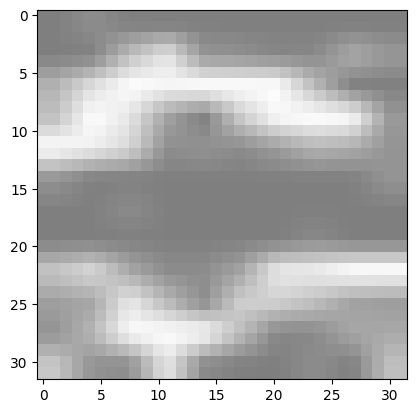

Label: c2


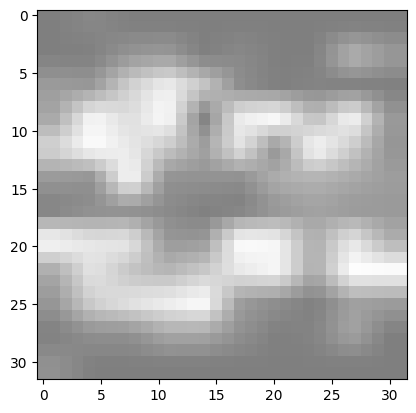

Label: c1


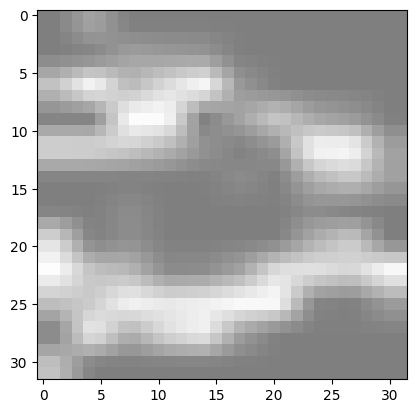

Label: c2


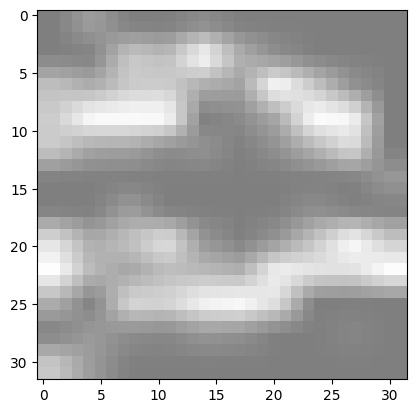

Tamanho do dataset: 140385 imagens


In [ ]:
# Carregar algumas amostras do DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Obter um batch de imagens
images, labels = next(iter(dataloader))

# Função para exibir imagens
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), interpolation='nearest')
    plt.show()

# Mostrar as imagens
for i in range(len(images)):
    print(f'Label: {dataset.classes[labels[i]]}')
    imshow(images[i])

# Verificar tamanho do dataset
print(f'Tamanho do dataset: {len(dataset)} imagens')

In [ ]:
# Verificar as classes atribuídas
print("Classes:", dataset.classes)

# Verificar alguns exemplos de labels
for idx, (path, label) in enumerate(dataset.imgs[50000:50100]):
    print(f"Path: {path}, Label: {label}")

In [ ]:
print(torch.cuda.is_available())  # Deve retornar True se uma GPU com CUDA estiver disponível
print(torch.cuda.device_count())  # Retorna o número de GPUs disponíveis
print(torch.cuda.get_device_name(0))  # Retorna o nome da GPU (se disponível)


True
1
NVIDIA GeForce GTX 1060 6GB


In [ ]:
# Agrupar imagens por indivíduo
individual_groups = defaultdict(list)
for idx, (path, _) in enumerate(dataset.imgs):
    filename = os.path.basename(path)
    print(filename)
    individual_id = filename.split('_')[2]  # Extrair o número do indivíduo
    individual_groups[individual_id].append(idx)

# Converter grupos para listas
individuals = list(individual_groups.values())
print(individuals)

In [ ]:
# Definir o dispositivo (GPU se disponível)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Inicializar KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Using device: cuda:0


In [ ]:
# RESNET50 COM UNDERSAMPLING
# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
f1_scores = []
roc_aucs = []
confusion_matrices = []

# Listas para armazenar as perdas (losses) de cada fold
training_losses = []
validation_losses = []

# Número do fold que você deseja utilizar (3 neste caso, que corresponde ao índice 2)
fold_desejado = 2

for fold, (train_idx, val_idx) in enumerate(kf.split(individuals)):
    if fold != fold_desejado:
        continue

    print(f'\nRodando apenas o Fold {fold + 1}/{k_folds}')

    # Obter os índices dos grupos para treino e validação
    train_indices = [idx for i in train_idx for idx in individuals[i]]
    val_indices = [idx for i in val_idx for idx in individuals[i]]

    # Obter os labels do conjunto de treino
    train_labels = [dataset.targets[idx] for idx in train_indices]

    # Dividir os índices em duas listas, uma para cada classe
    class_0_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 0]
    class_1_indices = [train_indices[i] for i in range(len(train_indices)) if train_labels[i] == 1]

    # Determinar o número de amostras na classe minoritária
    n_minority = min(len(class_0_indices), len(class_1_indices))

    # Realizar undersampling na classe majoritária para balancear as classes
    class_0_indices_resampled = resample(class_0_indices, replace=False, n_samples=n_minority, random_state=42)
    class_1_indices_resampled = resample(class_1_indices, replace=False, n_samples=n_minority, random_state=42)

    # Combinar as amostras resampled das duas classes
    train_indices_balanced = class_0_indices_resampled + class_1_indices_resampled

    # Agora, recalcular os labels após o undersampling
    train_labels_balanced = [dataset.targets[idx] for idx in train_indices_balanced]

    # Mostrar a nova distribuição das classes
    train_class_counts_balanced = Counter(train_labels_balanced)
    val_labels = [dataset.targets[idx] for idx in val_indices]
    val_class_counts = Counter(val_labels)

    print(f'Distribuição de classes no treinamento (balanceado): {train_class_counts_balanced}')
    print(f'Distribuição de classes na validação: {val_class_counts}')

    # Subconjuntos de treinamento e validação
    train_subset = Subset(dataset, train_indices_balanced)
    val_subset = Subset(dataset, val_indices)

    # DataLoader para treinamento e validação
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Carregar a ResNet50 pré-treinada e ajustar a última camada
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    # Modificar a primeira camada para aceitar imagens de 32x32
    model.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Ajustar para o número de classes

    # Congelar todas as camadas, exceto a última
    for param in model.parameters():
        param.requires_grad = False

    # Descongelar a primeira camada alterada e a camada fully connected
    for param in model.conv1.parameters():
        param.requires_grad = True

    # A última camada permanece treinável
    for param in model.fc.parameters():
        param.requires_grad = True

    # Mover o modelo para a GPU
    model = model.to(device)

    # Definir a loss function e o otimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00001)

    # Listas para armazenar as perdas por época
    fold_training_losses = []
    fold_validation_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Usando tqdm para mostrar o progresso das batches
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)
        for inputs, labels in progress_bar:
            # Mover os dados para a GPU
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Atualizando a barra de progresso com a perda atual
            progress_bar.set_postfix(loss=running_loss/len(train_loader))

        # Armazenar a perda de treinamento da época atual
        fold_training_losses.append(running_loss/len(train_loader))

        # Registrar a perda de treinamento no TensorBoard
        writer.add_scalar(f'Fold_{fold+1}/Training_Loss', running_loss/len(train_loader), epoch)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss/len(train_loader):.4f}')

        # Validação após cada época
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []
        all_probabilities = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                # Mover os dados para a GPU
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Probabilidade da classe 1

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Armazenar a perda de validação da época atual
        fold_validation_losses.append(val_loss/len(val_loader))

        # Calcular as métricas
        accuracy = 100 * correct / total
        balanced_acc = balanced_accuracy_score(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions, average='binary')
        roc_auc = roc_auc_score(all_labels, all_probabilities)

        print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {accuracy:.2f}%')
        print(f'Balanced Accuracy: {balanced_acc:.4f}')
        print(f'F1-Score: {f1:.4f}')
        print(f'ROC-AUC: {roc_auc:.4f}')

        # Registrar a perda e as métricas de validação no TensorBoard
        writer.add_scalar(f'Fold_{fold+1}/Validation_Loss', val_loss/len(val_loader), epoch)
        writer.add_scalar(f'Fold_{fold+1}/Accuracy', accuracy, epoch)
        writer.add_scalar(f'Fold_{fold+1}/Balanced_Accuracy', balanced_acc, epoch)
        writer.add_scalar(f'Fold_{fold+1}/F1_Score', f1, epoch)
        writer.add_scalar(f'Fold_{fold+1}/ROC_AUC', roc_auc, epoch)


    # Calcular a matriz de confusão após o último epoch do fold
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    confusion_matrices.append(conf_matrix)

    # Armazenar as métricas finais do fold
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_acc)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Armazenar as perdas de treinamento e validação para o fold
    training_losses.append(fold_training_losses)
    validation_losses.append(fold_validation_losses)

    print(f'Matriz de Confusão do Fold {fold + 1}:\n{conf_matrix}')

# Comparação das métricas para o fold 3
print('\nResultados do Fold 3:')
print(f'Acurácia: {accuracies[-1]:.2f}%')
print(f'Acurácia Balanceada: {balanced_accuracies[-1]:.4f}')
print(f'F1-Score: {f1_scores[-1]:.4f}')
print(f'ROC-AUC: {roc_aucs[-1]:.4f}')

# Mostrar a matriz de confusão do fold 3
print(f'\nMatriz de Confusão do Fold 3:\n{confusion_matrices[-1]}')


In [ ]:
writer.close()
